### Linear regression implementation with Numpy

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Create two variable with sample data
X = 3 * np.random.rand(100, 1)
y =5+ 3 * X + np.random.randn(100, 1)

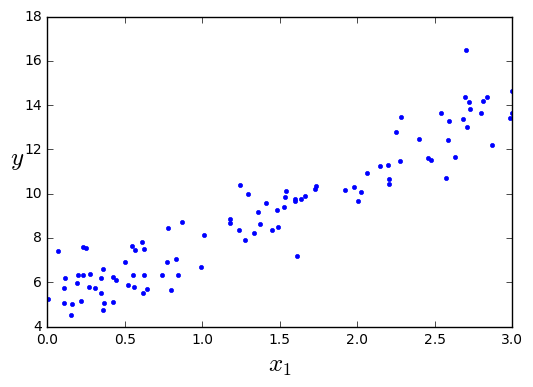

In [20]:
#Visualize data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [21]:
# add x0 = 1 to each instance, to balance array dimensions as well for theta 0
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [22]:
#theta value
theta_best

array([[ 4.96872368],
       [ 2.9836276 ]])

In [23]:
# Let's Predict value for new input
X_test = np.array([[0], [2]])

X_b_test=np.c_[np.ones((2,1)),X_test]
y_predict = X_b_test.dot(theta_best)
y_predict

array([[  4.96872368],
       [ 10.93597888]])

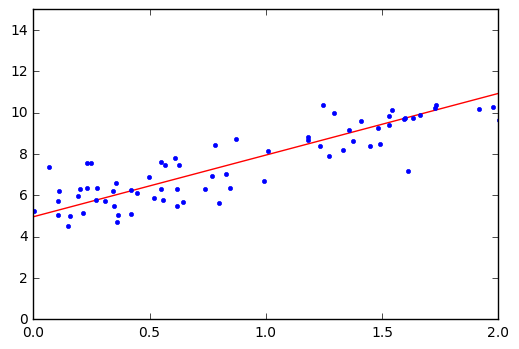

In [24]:
plt.plot(X_test, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [25]:
# Simple linear regression with Scikit Learn
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

reg.coef_,reg.intercept_

(array([[ 2.9836276]]), array([ 4.96872368]))

### Linear regression with Batch gradient descent


In [26]:
# Number of iteration thousands
alpha=0.1
iteration=1000
m = 100
theta = np.random.randn(2,1)

for i in range(iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta=theta-gradients*alpha

theta

array([[ 4.96872368],
       [ 2.9836276 ]])

In [27]:
# Let's Predict value for new input
X_test = np.array([[0], [2]])

X_b_test=np.c_[np.ones((2,1)),X_test]
y_predict=X_b_test.dot(theta)
y_predict

array([[  4.96872368],
       [ 10.93597888]])

### Linear regression with Stochastic gradient descent

In [28]:
#Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients
# based only on that single instance.

n_epochs=50
m = len(X_b)
alpha=0.1
theta= np.random.randn(2,1)
for i in range(n_epochs):
    for j in range(m):
        random_i=np.random.randint(m)
        X_new=X_b[random_i:random_i+1]
        y_new=y[random_i:random_i+1]
        gradient = 2 * X_new.T.dot(X_new.dot(theta) - y_new)
        theta=theta-gradient*alpha

theta

array([[ 5.15735538],
       [ 3.30498827]])

In [29]:
# Let's Predict value for new input
X_test = np.array([[0], [2]])

X_b_test=np.c_[np.ones((2,1)),X_test]
y_predict=X_b_test.dot(theta)
y_predict

array([[  5.15735538],
       [ 11.76733192]])

In [30]:
#Linear regression with SGD using Scikit Learn
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1, random_state=42)
reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=False)

In [31]:
reg.coef_,reg.intercept_

(array([ 2.96749266]), array([ 4.96048061]))

In [32]:
# Let's Predict value for new input
X_test = np.array([[0], [2]])
y_predict=reg.predict(X_test)
y_predict

array([  4.96048061,  10.89546592])

### Linear regression with mini batch gradient descent

In [33]:
# Mini-batch GD computes the gradients on small random sets of instances called mini-batches. 

theta_path_mgd = []

n_iterations = 1
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
theta

array([[ 3.40199512],
       [ 3.81981844]])

In [34]:
# Let's Predict value for new input
X_test = np.array([[0], [2]])

X_b_test=np.c_[np.ones((2,1)),X_test]
y_predict=X_b_test.dot(theta)
y_predict

array([[  3.40199512],
       [ 11.04163199]])

### Linear regression with Ridge regularization

In [35]:
# There are two way in which ridge regularization can be applied using scikit learn
#Using CLosed form equation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[0], [2]])


array([[  5.01534446],
       [ 10.91388654]])

In [36]:
# Using SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[0], [2]])

array([  3.1790779,  11.0618303])

### Linear regression with Lasso regularization

In [37]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[0], [2]])

array([  5.12679929,  10.86107107])

### Linear regression with ElasticNet regularization 

In [38]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[0], [2]])

array([  5.26625113,  10.79498857])